Bethany Rollen

# Module 10: Zach Hall Pandas Project

The exercises in the folders in the link below belong to Zach Hall, and were created as a supplemental learning opportunity, however I would recommend going through each exercise as it will help you learn to utilize Pandas more thoroughly. For that reason, I am turning this supplemental material, into an outright project, as the topic and mastery of the `pandas` library is critical to working as a Data Scientist or Python Developer. First you should clone or download the repo, and then **work through one exercise from each section**. Afterwards, you may submit a single file with the composite of the exercises you chose, or you may choose to push your code to a new GitHub Repo within your own Github, and submit the URL alongside your assignment for further feedback. I would recommend utilizing this as a first portfolio piece towards your growing GitHub. 

A cloned version of the Pandas Exercises repo may exist within your 10_mod_pandas folder already.

### [Zach Hall Github Repo: Pandas Exercises](https://github.com/zachhall/pandas_exercises)


As the author explains:
"Fed up with a ton of tutorials but no easy way to find exercises I decided to create a repo just with exercises to practice pandas. Don't get me wrong, tutorials are great resources, but to learn is to do. So unless you practice you won't learn."

There will be three different types of files in the exercise directories: 
<br>
1. Exercise instructions  
2. Solutions without code  
3. Solutions with code and comments

You may utilize the solutions with or without code/comments.
**All work you hand in you must be prepared to possibly explain during future class time.**

Below is an outline of the exercise paths for you to utilize. **One exercise should be chosen from each section below, and I would encourage variation as it will help you develop your skill at providing insight.**

### Exercise 1. Getting & Knowing Your Data
```./supplemental/01_Getting_&_Knowing_Your_Data```

```../supplemental/01_Getting_&_Knowing_Your_Data/Chipotle```

In [1]:
import pandas as pd
import numpy as np 

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
##What is the number of observations in dataset?  

chipo.shape[0] 

4622

In [6]:
##Number of columns in dataset?
chipo.shape[1]

5

In [7]:
### Print name of all columns

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
### How is the data indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [12]:
## Which one was least ordered item?

c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=True)
c.head(1)

,order_id,quantity
item_name,,
Carnitas Salad,1500,1


In [14]:
## How many items were ordered?

c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [15]:
### Step 11. What was the most ordered item in the choice_description column

c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [16]:
## How many items were ordered in total?

total_items_orders = chipo.quantity.sum()
total_items_orders

4972

In [19]:
## Turn the item price into a float

# Step a: check item price type

chipo.item_price.dtype

dtype('O')

In [27]:
 ## create lambda fxn and change type of item price

dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

TypeError: 'float' object is not subscriptable

In [28]:
## Check item price type

chipo.item_price.dtype

dtype('float64')

In [29]:
### How much was the revenue for the period in the dataset?

revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [30]:
# How many orders were made in the period???

orders = chipo.order_id.value_counts().count()
orders

1834

In [35]:
## What is the avg revenue amount per order??

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [36]:
## How many different items are sold?

chipo.item_name.value_counts().count()

50

### Exercise 2. Filtering & Sorting
```./supplemental/02_Filtering_&_Sorting```

```./supplemental/02_Filtering_&_Sorting/Fictional Army```

In [ ]:
### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [38]:
    import pandas as pd

In [ ]:
### Step 2. This is the data given as a dictionary

In [39]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [ ]:
### Step 3. Create a dataframe and assign it to a variable called army.
#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [46]:
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


In [59]:
army.set_index('origin', inplace=True)

KeyError: "None of ['origin'] are in the columns"

In [53]:
## Print only the column veterans

army.veterans

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

In [60]:
## Print the columns 'veterans' and 'deaths'

army[["veterans", "deaths"]]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


In [61]:
## Select the deaths, size, and deserters columns from Texas and California

army.loc[["Texas", "California"], ["deaths", "size", "deserters"]]

,deaths,size,deserters
origin,,,
Texas,25,1099,31
California,52,957,24


In [ ]:
## Select the rows 3 to 7 and the colums 3 to 6 

### Exercise 3. Grouping
```./supplemental/03_Grouping/Alcohol_Consumption ``

In [62]:
import pandas as pd

In [63]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [64]:
drinks.groupby('continent').beer_servings.mean() ## which contient drinks more beer on avg

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [65]:
drinks.groupby('continent').wine_servings.describe() ## wine consumption for each continent

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [66]:
drinks.groupby('continent').mean() ## print mean alcohol consumption per contient 

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [ ]:
### Exercise 4. Apply


```./supplemental/04_Apply/US_Crime_Rates```

In [67]:
import numpy as np
import pandas as pd

In [68]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()                ## assign it to a variable called crime

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [69]:
crime.info() ## What is the type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [70]:
del crime['Total']
crime.head()     #delete the total column

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Exercise 5. Merge
```./supplemental/05_Merge```

```./supplemental/05_Merge/Housing Market```

In [71]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)  ## Create 3 diff series, each of length 100 as follows:

0     1
1     1
2     4
3     2
4     3
     ..
95    3
96    3
97    2
98    2
99    3
Length: 100, dtype: int32 0     1
1     3
2     2
3     1
4     3
     ..
95    2
96    3
97    2
98    1
99    3
Length: 100, dtype: int32 0     15508
1     17207
2     22155
3     17339
4     28227
      ...  
95    19097
96    26649
97    13567
98    19516
99    11099
Length: 100, dtype: int32


### Exercise 6. Stats
```./supplemental/06_Stats```

```./supplemental/06_Stats/US_Baby_Names```

In [73]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [75]:
## See the first 20 entries

baby_names.head(20)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [76]:
## Are there more male or female names in the dataset?

baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Exercise 7. Visualization
```./supplemental/07_Visualization```

```./supplemental/07_Visualization/Chipotle```

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [80]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [81]:
chipo.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


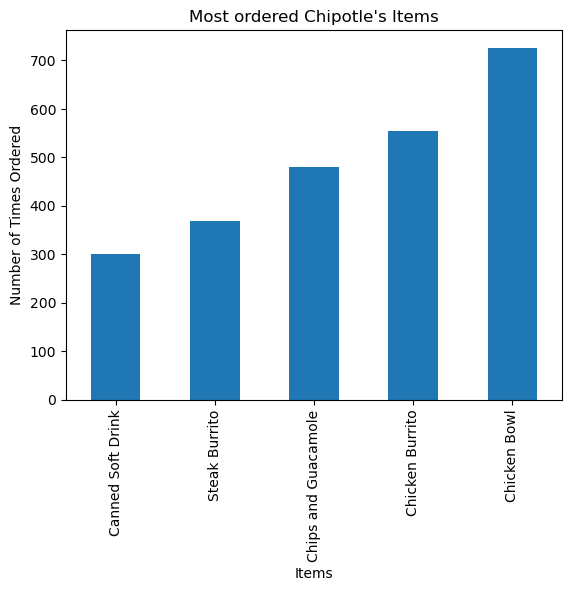

In [82]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

```./supplemental/07_Visualization/Online_Retail```

```./supplemental/07_Visualization/Scores```

```./supplemental/07_Visualization/Tips```

### Exercise 8. Creating Series and DataFrames
```./supplemental/08_Creating_Series_and_DataFrames```

```./supplemental/08_Creating_Series_and_DataFrames/Pokemon```

In [ ]:
import pandas as pd

In [83]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [84]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [85]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon  #place the order of columns as name, type, hp, evolution

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Exercise 9. Time Series
```./supplemental/09_Time_Series```

```./supplemental/09_Time_Series/Apple_Stock```

```./supplemental/09_Time_Series/Getting_Financial_Data```

In [92]:
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt

ModuleNotFoundError: No module named 'pandas_datareader'

In [91]:
start = dt.datatime(2015, 2, 2)
end = dt.datatime.today()
start

NameError: name 'dt' is not defined

In [90]:
stocks = ['AAPL', 'TSLA', 'IBM', 'LNKD']

### Exercise 10. Deleting
```./supplemental/10_Deleting```

```./supplemental/10_Deleting/Iris```

```./supplemental/10_Deleting/Wine```

In [ ]:
import pandas as pd
import numpy as np

In [93]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [98]:
## Delete 1st.4th.7th.9th.11th.13th and 14

wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [99]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()  ## Assign the columns 

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [94]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()  ##Delete th

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [95]:
wine.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

### Exercise 11. Indexing
```./supplemental/11_Indexing```

In [ ]:
import pandas as pd

Video tutorials of data scientists working through the above exercises:

- - - 
<!--NAVIGATION-->
Module 10. | [Introduction to Pandas](./01_introduction_to_pandas.ipynb) | [Introducing Panda Objects](./02_introducing-pandas-objects.ipynb) | [Data Manipulation with Pandas](./03_data_manipulation_pandas.ipynb) | [Getting Started with Pandas](./04_getting_started_pandas.ipynb) | **[ZachHallRepo](./05_ZachHallRepo.ipynb)** | [Exercises](./06_pandas_exercises.ipynb)
<br>